<table style="width:100%;"/>
    <tr>
        <td style="width:80%; text-align:left; vertical-align: center;"/>
            <img src="Figures/Logo_Combined.png" width="350" alt="logo" align="left"/>
        </td/>
        <td style="width:20%; text-align:left; vertical-align: top;"/>
            Biochemical Engineering Lab<br/>
            & Janssen Cilag AG<br/>
        </td/>
    </tr/>
</table/>

<center> 
    <h1>Master Thesis on Protein Aggregation: Analytical Solution for a Model System </h1>
    <h3>by Eduard Meier</h3><br/>
</center>

<div class="alert alert-block alert-info">
<b>Remark:</b> The presented equations are based on the results of <i>Phys. Fluids 33, 023102 (2021)</i>, where A. Oza and D. Venerus presented an analytical solution for dynamic behaviour of the velocity field in a parallel-plate rheometer.
</div>

In [1]:
# Import python libraries used in the following
import numpy as np                            # Import numerical python library
import matplotlib as mpl                      # Import python mathematical plotting library
import matplotlib.pyplot as plt               # Import python mathematical plotting library
from findiff import FinDiff, coefficients, Coefficient  # Import python package for finite diff.$from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import axes3d

import matplotlib.animation as animation
from IPython import display
from moviepy.editor import VideoFileClip
import os

plt.rcParams['image.cmap']='jet'
#plt.rcParams['image.cmap']='magma'


plt.rcParams.update({
'text.usetex': True,
'font.family': 'serif',
'font.size'  : 12,
'font.serif': ['Computern Modern Roman'],
})

A device to impose well-defined shear stress to protein solutions has been developed as displayed in the schematic below:



<center>
<img src="./Figures/DeviceShear_Labels_V3_Cut.png" alt="ShearDevice" style="width: 300px;"/>
</br>
Figure 1: Shear device schematic including labeled parts.
</center>

The device is geometrically comparable to a parallel-plate rheometer (as displayed schematically in Fig. 2), for which an analytical solution of the velocity field dynamics exists. The parallel-plate rheometer can thus serve as an idealized model system, which is investigated in the following section.

# 1. Parallel-Plate Rheometer

<center>
<img src="./Figures/Sketch_ParallelPlates_Cut.png" alt="ParallelPlates_Rheometer" style="width: 300px;"/>
</center>
Figure 2: Parallel-plate rheometer schematic, featuring a stationary lower plate and an upper plate rotating at an angular velocity $\Omega$. The gap between the two plates has a height $H$, a radius $R$ and is completely filled with an incompressible Newtonian liquid.

## 1.1 Transient Solution

Due to the axial symmetry of the considered system, it is treated in cylindrical coordinates. It has been shown that only the (dimensionless) tangential velocity component, $u_\theta^*$, is non-zero and it evolves according to

\begin{equation}
    u^*_\theta (r^*,z^*,t^*) = r^* \left[ z^* - 2 \sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n \pi} \sin{(n \pi z^*)} \exp{\left( - \frac{n^2 \pi^2}{\alpha^2}t^* \right)}\right] \; ,
\end{equation}

which is found solving the Navier-Stokes equations in the creeping flow limit (= unsteady Stokes equations). 

The above equation is presented in dimensionless form making use of the non-dimensional variables $u_\theta^* = u_\theta/\Omega R, \; r^* = r/R, \; z^* = z/H, \; t^* = \nu t /R^2$ and $\alpha = H/R$.


In [2]:
def u_theta_ndim(r, z, t, alpha):
    
    infsum = 0
    
    for n in range(1, 10):
        
        factor1 = (-1)**(n-1) / (n*np.pi)
        factor2 = np.sin(n*np.pi*z)
        factor3 = np.exp(- n**2 * np.pi**2 / alpha**2 * t)
                
        infsum += factor1 * factor2 * factor3 
        
    return r * (z - 2*infsum)

In [3]:
def u_theta(r, z, t, alpha, R, H, Omega, nu):
    
    infsum = 0
    
    for n in range(1, 10):
        
        factor1 = (-1)**(n-1) / (n*np.pi)
        factor2 = np.sin(n*np.pi*z/H)
        factor3 = np.exp(- n**2 * np.pi**2 / alpha**2 * nu * t / R**2)
        
        infsum += factor1 * factor2 * factor3 
        
    return r/R * (z/H - 2*infsum) * Omega * R

## 1.2 Steady-State Solution

The steady-state solution ($t \rightarrow \infty$) for the tangential velocity component thus reduces to

\begin{equation}
    u_\theta^*(r^*,z^*, \infty) = u_{\theta, \mathrm{ss}}^* = r^*z^*
\end{equation}

In [4]:
def u_theta_SS_ndim(r_ndim, z_ndim):
    
    return np.multiply(r_ndim, z_ndim)

In [5]:
def u_theta_SS(r, z, R, H, Omega):
    
    return np.multiply(r/R, z/H) * Omega * R

## 2.1 Steady-State Plots

In [6]:
# Set paramater values (considering sizing of shear device)

r0 = 12e-3                                    # Minimal radius [m]
R = 20e-3                                     # Maximal radius [m]
H = 0.4e-3                                    # Cavity height [m]
Omega = 2 * np.pi * np.array([100, 200, 300]) * 1/60 # Angular velocity [Rad/s]
alpha = H / R                                 # Dim.-less parameter

nu = 1e-6                                     # Kin. viscosity, water [m^2/s]

r = np.linspace(0, R, 1000)                   # Array of radial coord. [m]
dr = r[1] - r[0]
z = np.linspace(0, H, 1000)                   # Array of axial coord. [m]
dz = z[1] - z[0]
t = np.linspace(0.01, 1, 1000)                   # Array of times [s]
dt = t[1] - t[0]

r_ndim = r / R
dr_ndim = r_ndim[1] - r_ndim[0]
z_ndim = z / H
dz_ndim = z_ndim[1] - z_ndim[0]
t_ndim = nu * t / R**2
dt_ndim = t_ndim[1] - t_ndim[0]

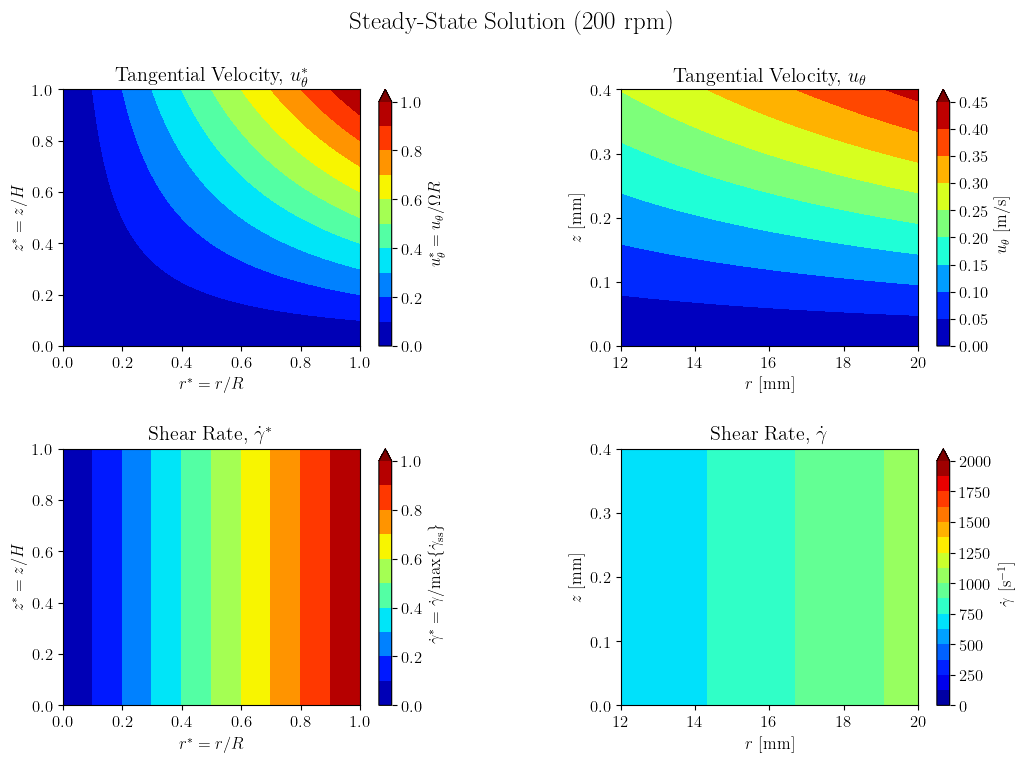

In [7]:
# Create meshgrids for computations
rr, zz = np.meshgrid(r, z, indexing='ij')
rr_ndim, zz_ndim = np.meshgrid(r_ndim, z_ndim, indexing='ij')

# Calculate steady-state velocity profile
utheta_SS = u_theta_SS(rr, zz, R, H, Omega[1])
utheta_SS_ndim = u_theta_SS_ndim(rr_ndim, zz_ndim)

# Define the derivative (finite differences)
d_dz = FinDiff(1, dz)

# Compute the derivative
dutheta_dz_SS = d_dz(utheta_SS)
dutheta_dz_SS_ndim = d_dz(utheta_SS_ndim)

# Plot (tangential) velocity profile

fig, _axs = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
fig.subplots_adjust(hspace=0.4, wspace=0.5)
axs = _axs.flatten()

# 1. non-dimensional
levels1 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
cont1 = axs[0].contourf(rr_ndim, zz_ndim, utheta_SS_ndim, levels1, extend="max")
fig.colorbar(cont1, ax=axs[0], label=r'$u_\theta^* = u_\theta / \Omega R$')
axs[0].set_title(r'Tangential Velocity, $u_\theta^*$')
axs[0].set_xlabel(r'$r^* = r/R$')
axs[0].set_ylabel(r'$z^* = z/H$')


# 2. dimensional
levels2 = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
cont2 = axs[1].contourf(1e3*rr, 1e3*zz, utheta_SS, levels2, extend="max")
axs[1].set_xlim([1e3*r0, 1e3*R])
fig.colorbar(cont2, ax=axs[1], label=r'$u_\theta$ [m/s]')
axs[1].set_title(r'Tangential Velocity, $u_\theta$')
axs[1].set_xlabel(r'$r$ [mm]')
axs[1].set_ylabel(r'$z$ [mm]')

# Plot shear rates

# 1. non-dimensional
levels3 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
cont3 = axs[2].contourf(rr_ndim, zz_ndim, dutheta_dz_SS_ndim/np.max(dutheta_dz_SS_ndim), levels3, extend="max")
fig.colorbar(cont3, ax=axs[2], label=r'$\dot{\gamma}^* = \dot{\gamma}/$max$\{\dot{\gamma}_\mathrm{ss}\}$ ')
axs[2].set_title(r'Shear Rate, $\dot{\gamma}^*$')
axs[2].set_xlabel(r'$r^* = r/R$')
axs[2].set_ylabel(r'$z^* = z/H$')

# 2. dimensional
levels4 = np.arange(0, 2001, 125)
cont4 = axs[3].contourf(1e3*rr, 1e3*zz, dutheta_dz_SS, levels4, extend="max")
axs[3].set_xlim([1e3*r0, 1e3*R])
fig.colorbar(cont4, ax=axs[3], label=r'$\dot{\gamma}$  [s$^{-1}$]')
axs[3].set_title(r'Shear Rate, $\dot{\gamma}$')
axs[3].set_xlabel(r'$r$ [mm]')
axs[3].set_ylabel(r'$z$ [mm]')

plt.suptitle(r'Steady-State Solution (200 rpm)', fontsize=18, y=0.98)

fileNamePdf = os.path.join('..', '02_Plots', '05_Simulation', '01_PDF', 'SteadyState.pdf')
fileNamePng = os.path.join('..', '02_Plots', '05_Simulation', '02_PNG', 'SteadyState.png')

plt.savefig(fileNamePdf, bbox_inches='tight')
plt.savefig(fileNamePng, bbox_inches='tight')

plt.show()

# alternatives: plt.contourf OR plt.pcolormesh

## 2.2 Transient Plots

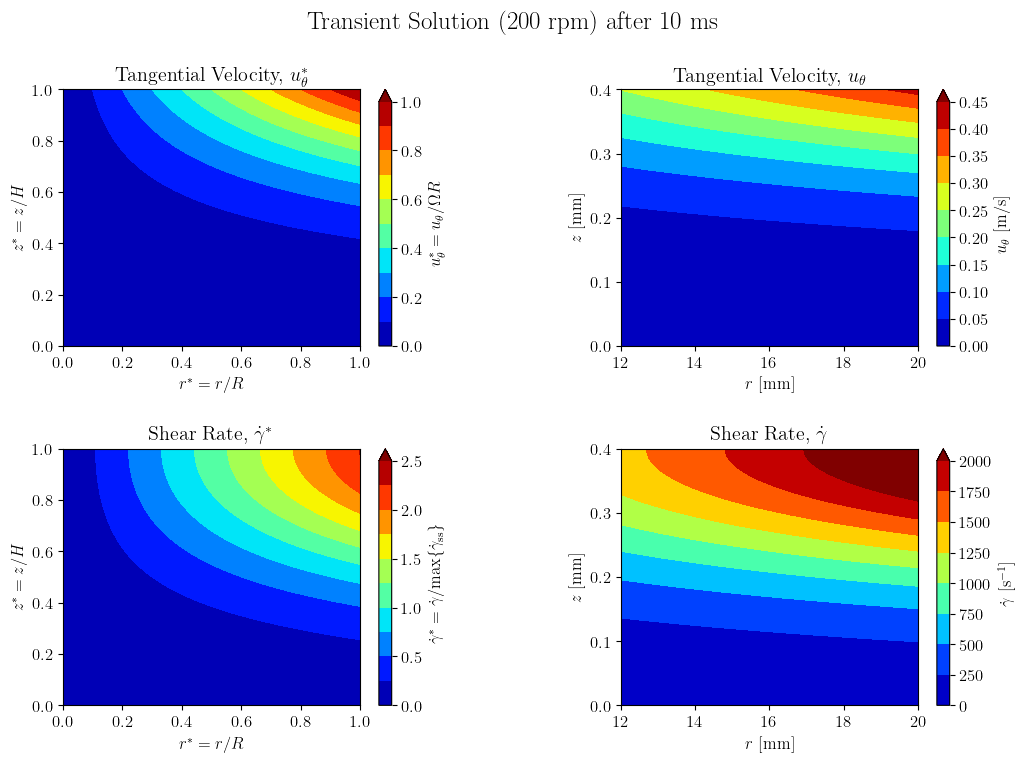

In [8]:
idx = 0

tx = t[idx]

tx_ndim = t_ndim[idx]

# Create meshgrids for computations
rr, zz = np.meshgrid(r, z, indexing='ij')
rr_ndim, zz_ndim = np.meshgrid(r_ndim, z_ndim, indexing='ij')

# Calculate steady-state velocity profile
utheta = u_theta(rr, zz, tx, alpha, R, H, Omega[1], nu)
utheta_ndim = u_theta_ndim(rr_ndim, zz_ndim, tx_ndim, alpha)

# Define the derivative (finite differences)
d_dz = FinDiff(1, dz)

# Compute the derivative
dutheta_dz = d_dz(utheta)
dutheta_dz_ndim = d_dz(utheta_ndim)

# Plot (tangential) velocity profile

fig, _axs = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
fig.subplots_adjust(hspace=0.4, wspace=0.5)
axs = _axs.flatten()

# 1. non-dimensional
levels1 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
cont1 = axs[0].contourf(rr_ndim, zz_ndim, utheta_ndim, levels1, extend="max")
fig.colorbar(cont1, ax=axs[0], label=r'$u_\theta^* = u_\theta / \Omega R$')
axs[0].set_title(r'Tangential Velocity, $u_\theta^*$')
axs[0].set_xlabel(r'$r^* = r/R$')
axs[0].set_ylabel(r'$z^* = z/H$')

# 2. dimensional
levels2 = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
cont2 = axs[1].contourf(1e3*rr, 1e3*zz, utheta, levels2, extend="max")
axs[1].set_xlim([1e3*r0, 1e3*R])
fig.colorbar(cont2, ax=axs[1], label=r'$u_\theta$ [m/s]')
axs[1].set_title(r'Tangential Velocity, $u_\theta$')
axs[1].set_xlabel(r'$r$ [mm]')
axs[1].set_ylabel(r'$z$ [mm]')


# Plot shear rates

# 1. non-dimensional
levels3 = np.arange(0, 2.6, 0.25)
cont3 = axs[2].contourf(rr_ndim, zz_ndim, dutheta_dz_ndim/np.max(dutheta_dz_SS_ndim), levels3, extend="max")
fig.colorbar(cont3, ax=axs[2], label=r'$\dot{\gamma}^* = \dot{\gamma}/$max$\{\dot{\gamma}_\mathrm{ss}\}$ ')
axs[2].set_title(r'Shear Rate, $\dot{\gamma}^*$')
axs[2].set_xlabel(r'$r^* = r/R$')
axs[2].set_ylabel(r'$z^* = z/H$')

# 2. dimensional
levels4 = np.arange(0, 2001, 250)
cont4 = axs[3].contourf(1e3*rr, 1e3*zz, dutheta_dz, levels4, extend="max")
axs[3].set_xlim([1e3*r0, 1e3*R])
fig.colorbar(cont4, ax=axs[3], label=r'$\dot{\gamma}$  [s$^{-1}$]')
axs[3].set_title(r'Shear Rate, $\dot{\gamma}$')
axs[3].set_xlabel(r'$r$ [mm]')
axs[3].set_ylabel(r'$z$ [mm]')

fig.suptitle(r'Transient Solution (200 rpm) after {:.0f} ms'.format(tx*1e3), fontsize=18, y=0.98)

fileNamePdf = os.path.join('..', '02_Plots', '05_Simulation', '01_PDF', 'Transient_10ms.pdf')
fileNamePng = os.path.join('..', '02_Plots', '05_Simulation', '02_PNG', 'Transient_10ms.png')

plt.savefig(fileNamePdf, bbox_inches='tight')
plt.savefig(fileNamePng, bbox_inches='tight')

plt.show()

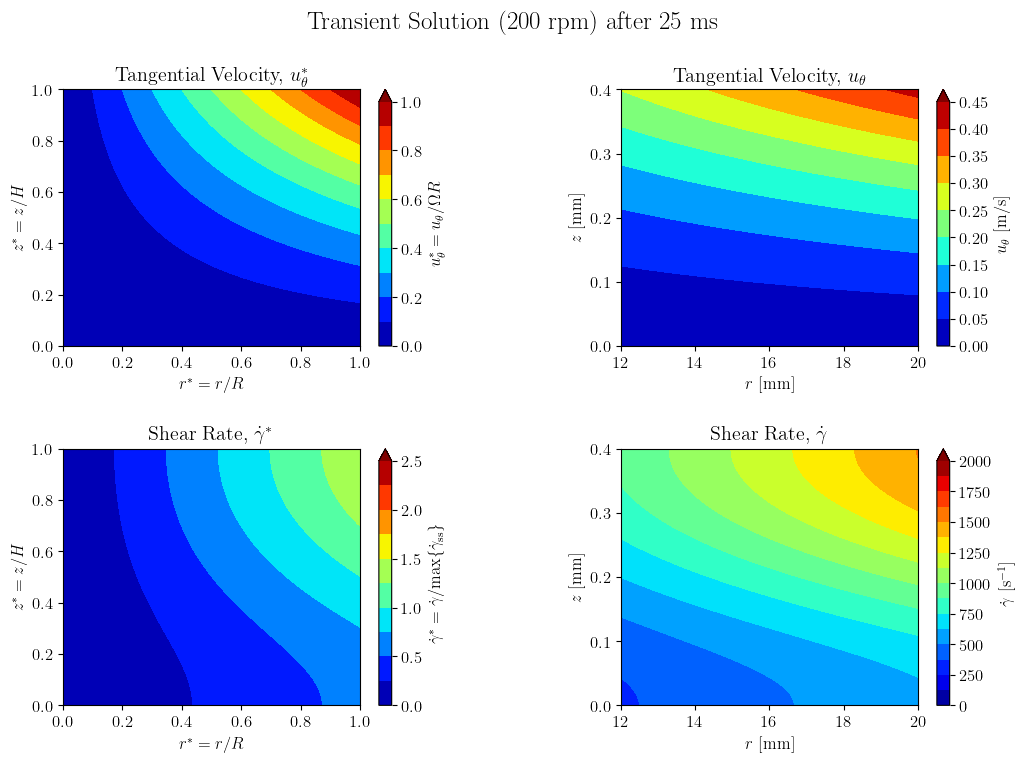

In [10]:
idx = 15

tx = t[idx]

tx_ndim = t_ndim[idx]

# Create meshgrids for computations
rr, zz = np.meshgrid(r, z, indexing='ij')
rr_ndim, zz_ndim = np.meshgrid(r_ndim, z_ndim, indexing='ij')

# Calculate steady-state velocity profile
utheta = u_theta(rr, zz, tx, alpha, R, H, Omega[1], nu)
utheta_ndim = u_theta_ndim(rr_ndim, zz_ndim, tx_ndim, alpha)

# Define the derivative (finite differences)
d_dz = FinDiff(1, dz)

# Compute the derivative
dutheta_dz = d_dz(utheta)
dutheta_dz_ndim = d_dz(utheta_ndim)

# Plot (tangential) velocity profile

fig, _axs = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
fig.subplots_adjust(hspace=0.4, wspace=0.5)
axs = _axs.flatten()

# 1. non-dimensional
levels1 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
cont1 = axs[0].contourf(rr_ndim, zz_ndim, utheta_ndim, levels1, extend="max")
fig.colorbar(cont1, ax=axs[0], label=r'$u_\theta^* = u_\theta / \Omega R$')
axs[0].set_title(r'Tangential Velocity, $u_\theta^*$')
axs[0].set_xlabel(r'$r^* = r/R$')
axs[0].set_ylabel(r'$z^* = z/H$')

# 2. dimensional
levels2 = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
cont2 = axs[1].contourf(1e3*rr, 1e3*zz, utheta, levels2, extend="max")
axs[1].set_xlim([1e3*r0, 1e3*R])
fig.colorbar(cont2, ax=axs[1], label=r'$u_\theta$ [m/s]')
axs[1].set_title(r'Tangential Velocity, $u_\theta$')
axs[1].set_xlabel(r'$r$ [mm]')
axs[1].set_ylabel(r'$z$ [mm]')


# Plot shear rates

# 1. non-dimensional
levels3 = np.arange(0, 2.6, 0.25)
cont3 = axs[2].contourf(rr_ndim, zz_ndim, dutheta_dz_ndim/np.max(dutheta_dz_SS_ndim), levels3, extend="max")
fig.colorbar(cont3, ax=axs[2], label=r'$\dot{\gamma}^* = \dot{\gamma}/$max$\{\dot{\gamma}_\mathrm{ss}\}$ ')
axs[2].set_title(r'Shear Rate, $\dot{\gamma}^*$')
axs[2].set_xlabel(r'$r^* = r/R$')
axs[2].set_ylabel(r'$z^* = z/H$')

# 2. dimensional
levels4 = np.arange(0, 2001, 125)
cont4 = axs[3].contourf(1e3*rr, 1e3*zz, dutheta_dz, levels4, extend="max")
axs[3].set_xlim([1e3*r0, 1e3*R])
fig.colorbar(cont4, ax=axs[3], label=r'$\dot{\gamma}$  [s$^{-1}$]')
axs[3].set_title(r'Shear Rate, $\dot{\gamma}$')
axs[3].set_xlabel(r'$r$ [mm]')
axs[3].set_ylabel(r'$z$ [mm]')

fig.suptitle(r'Transient Solution (200 rpm) after {:.0f} ms'.format(tx*1e3), fontsize=18, y=0.98)

fileNamePdf = os.path.join('..', '02_Plots', '05_Simulation', '01_PDF', 'Transient_25ms.pdf')
fileNamePng = os.path.join('..', '02_Plots', '05_Simulation', '02_PNG', 'Transient_25ms.png')

plt.savefig(fileNamePdf, bbox_inches='tight')
plt.savefig(fileNamePng, bbox_inches='tight')

plt.show()

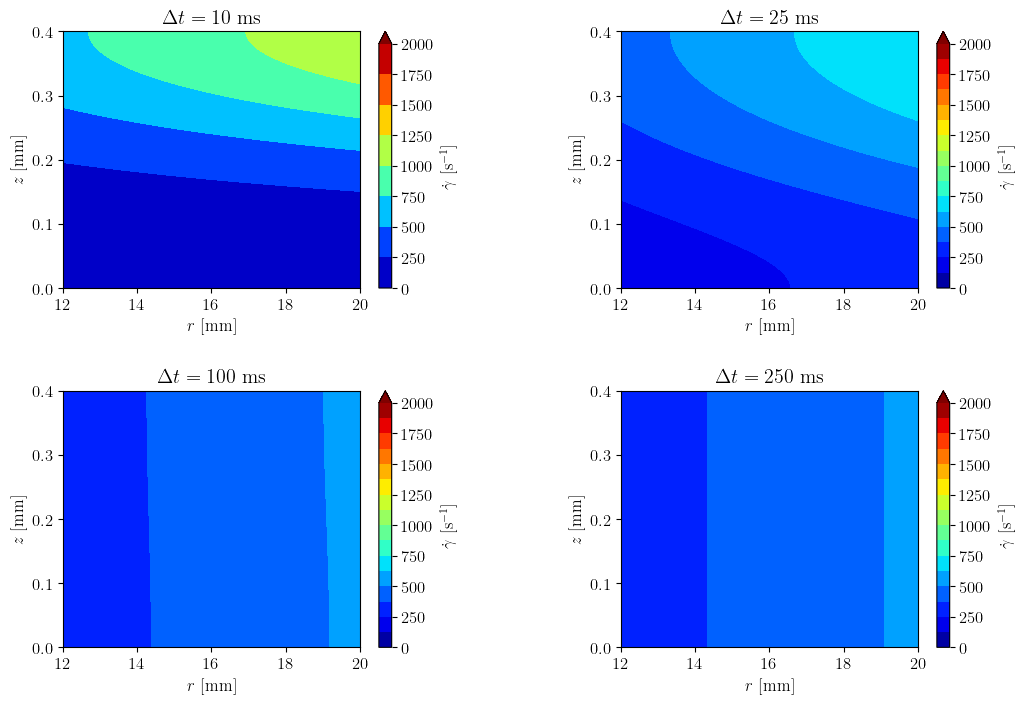

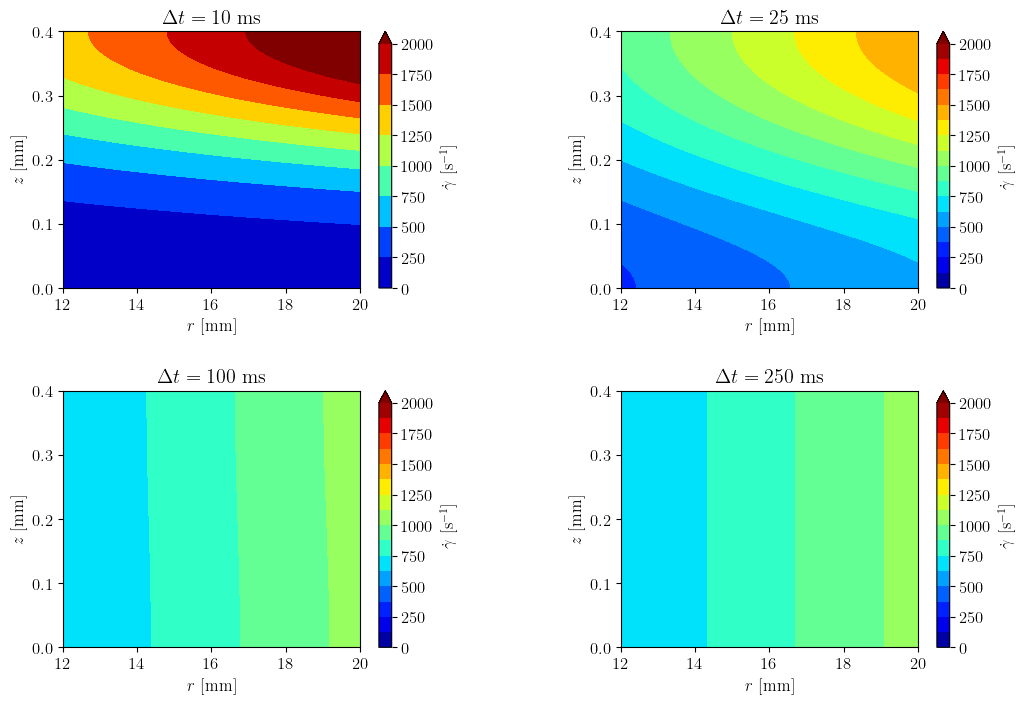

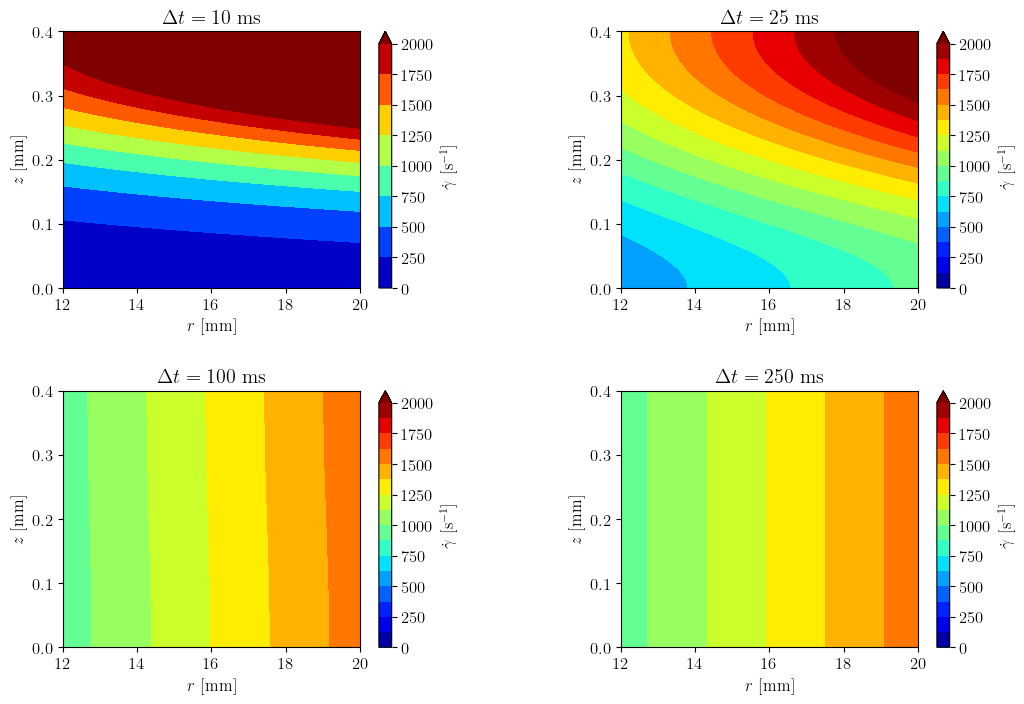

In [11]:
for i, Om in enumerate(Omega):

    idx = 1

    tx = [10e-3, 25e-3, 100e-3, 250e-3]

    tx_ndim = t_ndim[idx]

    # Create meshgrids for computations
    rr, zz = np.meshgrid(r, z, indexing='ij')
    rr_ndim, zz_ndim = np.meshgrid(r_ndim, z_ndim, indexing='ij')

    # Calculate steady-state velocity profile
    utheta1 = u_theta(rr, zz, tx[0], alpha, R, H, Om, nu)
    utheta2 = u_theta(rr, zz, tx[1], alpha, R, H, Om, nu)
    utheta3 = u_theta(rr, zz, tx[2], alpha, R, H, Om, nu)
    utheta4 = u_theta(rr, zz, tx[3], alpha, R, H, Om, nu)

    utheta_ndim = u_theta_ndim(rr_ndim, zz_ndim, tx_ndim, alpha)

    # Define the derivative (finite differences)
    d_dz = FinDiff(1, dz)

    # Compute the derivative
    dutheta_dz1 = d_dz(utheta1)
    dutheta_dz2 = d_dz(utheta2)
    dutheta_dz3 = d_dz(utheta3)
    dutheta_dz4 = d_dz(utheta4)

    dutheta_dz_ndim = d_dz(utheta_ndim)

    # Plot (tangential) velocity profile

    fig, _axs = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
    fig.subplots_adjust(hspace=0.4, wspace=0.5)
    axs = _axs.flatten()

    # 1. dt = 10 ms
    levels1 = np.arange(0, 2001, 250)
    cont1 = axs[0].contourf(1e3*rr, 1e3*zz, dutheta_dz1, levels1,  extend="max")
    fig.colorbar(cont1, ax=axs[0], label=r'$\dot{\gamma}$  [s$^{-1}$]')
    axs[0].set_xlim([1e3*r0, 1e3*R])
    axs[0].set_title(r'$\Delta t = 10$ ms')
    axs[0].set_xlabel(r'$r$ [mm]')
    axs[0].set_ylabel(r'$z$ [mm]')

    # 2. dt = 25 ms
    levels2 = np.arange(0, 2001, 125)
    cont2 = axs[1].contourf(1e3*rr, 1e3*zz, dutheta_dz2, levels2,  extend="max")
    fig.colorbar(cont2, ax=axs[1], label=r'$\dot{\gamma}$  [s$^{-1}$]')
    axs[1].set_xlim([1e3*r0, 1e3*R])
    axs[1].set_title(r'$\Delta t = 25$ ms')
    axs[1].set_xlabel(r'$r$ [mm]')
    axs[1].set_ylabel(r'$z$ [mm]')

    # 3. dt = 100 ms
    levels3 = np.arange(0, 2001, 125)
    cont3 = axs[2].contourf(1e3*rr, 1e3*zz, dutheta_dz3, levels3,  extend="max")
    fig.colorbar(cont3, ax=axs[2], label=r'$\dot{\gamma}$  [s$^{-1}$]')
    axs[2].set_xlim([1e3*r0, 1e3*R])
    axs[2].set_title(r'$\Delta t = 100$ ms')
    axs[2].set_xlabel(r'$r$ [mm]')
    axs[2].set_ylabel(r'$z$ [mm]')

    # 4. dt = 250 ms
    levels4 = np.arange(0, 2001, 125)
    cont4 = axs[3].contourf(1e3*rr, 1e3*zz, dutheta_dz4, levels4,  extend="max")
    fig.colorbar(cont4, ax=axs[3], label=r'$\dot{\gamma}$  [s$^{-1}$]')
    axs[3].set_xlim([1e3*r0, 1e3*R])
    axs[3].set_title(r'$\Delta t = 250$ ms')
    axs[3].set_xlabel(r'$r$ [mm]')
    axs[3].set_ylabel(r'$z$ [mm]')

    #fig.suptitle(r'Transient Solution (200 rpm) after {:.0f} ms'.format(tx*1e3), fontsize=18, y=0.98)

    baseName = 'ShearRateEvolution_Contour'

    if i == 0:
        rpm = '100rpm' 
    elif i == 1:
        rpm = '200rpm' 
    else:
        rpm = '300rpm' 

    fullNamePdf = baseName + '_' + rpm + '.pdf'
    fullNamePng = baseName + '_' + rpm + '.png'
    
    fileNamePdf = os.path.join('..', '02_Plots', '05_Simulation', '01_PDF', fullNamePdf)
    fileNamePng = os.path.join('..', '02_Plots', '05_Simulation', '02_PNG', fullNamePng)

    plt.savefig(fileNamePdf, bbox_inches='tight')
    plt.savefig(fileNamePng, bbox_inches='tight')
    
    plt.show()

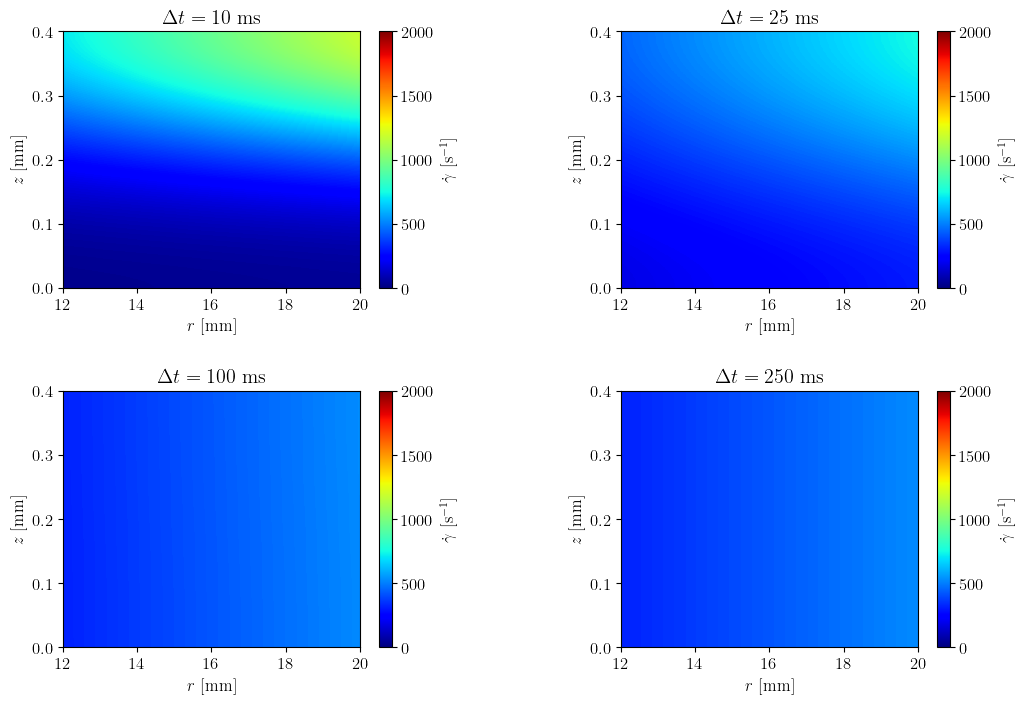

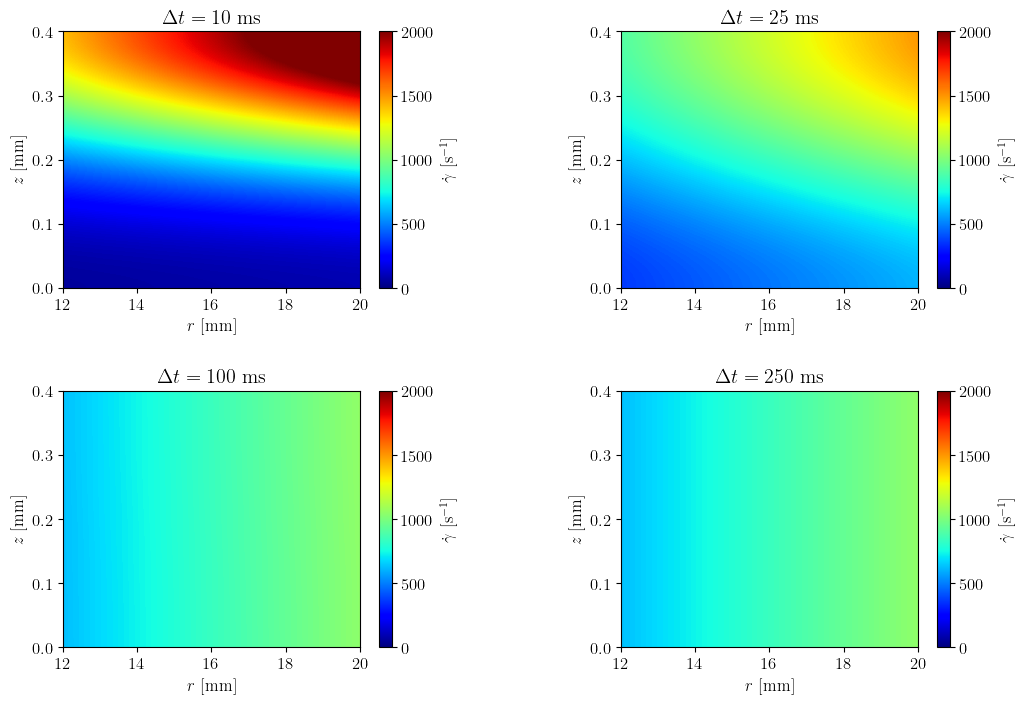

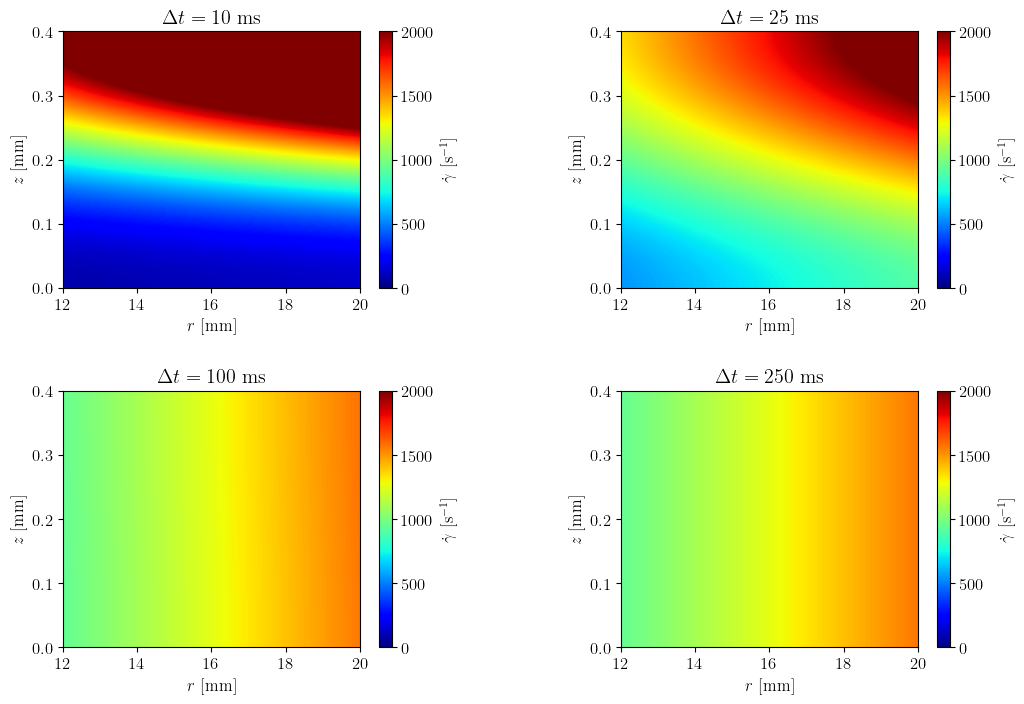

In [12]:
for i, Om in enumerate(Omega):

    idx = 1

    tx = [10e-3, 25e-3, 100e-3, 250e-3]

    tx_ndim = t_ndim[idx]

    # Create meshgrids for computations
    rr, zz = np.meshgrid(r, z, indexing='ij')
    rr_ndim, zz_ndim = np.meshgrid(r_ndim, z_ndim, indexing='ij')

    # Calculate steady-state velocity profile
    utheta1 = u_theta(rr, zz, tx[0], alpha, R, H, Om, nu)
    utheta2 = u_theta(rr, zz, tx[1], alpha, R, H, Om, nu)
    utheta3 = u_theta(rr, zz, tx[2], alpha, R, H, Om, nu)
    utheta4 = u_theta(rr, zz, tx[3], alpha, R, H, Om, nu)

    utheta_ndim = u_theta_ndim(rr_ndim, zz_ndim, tx_ndim, alpha)

    # Define the derivative (finite differences)
    d_dz = FinDiff(1, dz)

    # Compute the derivative
    dutheta_dz1 = d_dz(utheta1)
    dutheta_dz2 = d_dz(utheta2)
    dutheta_dz3 = d_dz(utheta3)
    dutheta_dz4 = d_dz(utheta4)

    dutheta_dz_ndim = d_dz(utheta_ndim)

    # Plot (tangential) velocity profile

    fig, _axs = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
    fig.subplots_adjust(hspace=0.4, wspace=0.5)
    axs = _axs.flatten()

    # 1. dt = 10 ms
    levels1 = np.arange(0, 2001, 250)
    cont1 = axs[0].pcolormesh(1e3*rr, 1e3*zz, dutheta_dz1, vmin=0, vmax=2001, rasterized=True)
    fig.colorbar(cont1, ax=axs[0], label=r'$\dot{\gamma}$  [s$^{-1}$]')
    axs[0].set_xlim([1e3*r0, 1e3*R])
    axs[0].set_title(r'$\Delta t = 10$ ms')
    axs[0].set_xlabel(r'$r$ [mm]')
    axs[0].set_ylabel(r'$z$ [mm]')

    # 2. dt = 25 ms
    levels2 = np.arange(0, 2001, 125)
    cont2 = axs[1].pcolormesh(1e3*rr, 1e3*zz, dutheta_dz2, vmin=0, vmax=2001, rasterized=True)
    fig.colorbar(cont2, ax=axs[1], label=r'$\dot{\gamma}$  [s$^{-1}$]')
    axs[1].set_xlim([1e3*r0, 1e3*R])
    axs[1].set_title(r'$\Delta t = 25$ ms')
    axs[1].set_xlabel(r'$r$ [mm]')
    axs[1].set_ylabel(r'$z$ [mm]')

    # 3. dt = 100 ms
    levels3 = np.arange(0, 2001, 125)
    cont3 = axs[2].pcolormesh(1e3*rr, 1e3*zz, dutheta_dz3, vmin=0, vmax=2001, rasterized=True)
    fig.colorbar(cont3, ax=axs[2], label=r'$\dot{\gamma}$  [s$^{-1}$]')
    axs[2].set_xlim([1e3*r0, 1e3*R])
    axs[2].set_title(r'$\Delta t = 100$ ms')
    axs[2].set_xlabel(r'$r$ [mm]')
    axs[2].set_ylabel(r'$z$ [mm]')

    # 4. dt = 250 ms
    levels4 = np.arange(0, 2001, 125)
    cont4 = axs[3].pcolormesh(1e3*rr, 1e3*zz, dutheta_dz4, vmin=0, vmax=2001, rasterized=True)
    fig.colorbar(cont4, ax=axs[3], label=r'$\dot{\gamma}$  [s$^{-1}$]')
    axs[3].set_xlim([1e3*r0, 1e3*R])
    axs[3].set_title(r'$\Delta t = 250$ ms')
    axs[3].set_xlabel(r'$r$ [mm]')
    axs[3].set_ylabel(r'$z$ [mm]')

    #fig.suptitle(r'Transient Solution (200 rpm) after {:.0f} ms'.format(tx*1e3), fontsize=18, y=0.98)
    baseName = 'ShearRateEvolution_Mesh'
    
    if i == 0:
        rpm = '100rpm' 
    elif i == 1:
        rpm = '200rpm' 
    else:
        rpm = '300rpm' 
        
    fullNamePdf = baseName + '_' + rpm + '.pdf'
    fullNamePng = baseName + '_' + rpm + '.png'
    
    fileNamePdf = os.path.join('..', '02_Plots', '05_Simulation', '01_PDF', fullNamePdf)
    fileNamePng = os.path.join('..', '02_Plots', '05_Simulation', '02_PNG', fullNamePng)

    plt.savefig(fileNamePdf, bbox_inches='tight')
    plt.savefig(fileNamePng, bbox_inches='tight')
    
    plt.show()

## 2.3 Alternative Plots

In [22]:
# Set paramater values (considering sizing of shear device)

r0 = 12e-3                                    # Minimal radius [m]
R = 20e-3                                     # Maximal radius [m]
H = 0.4e-3                                    # Cavity height [m]
Omega = 2 * np.pi * np.array([100, 200, 300]) * 1/60 # Angular velocity [Rad/s]
alpha = H / R                                 # Dim.-less parameter

nu = 1e-6                                     # Kin. viscosity, water [m^2/s]

r = np.linspace(0, R, 1000)                   # Array of radial coord. [m]
dr = r[1] - r[0]
z = np.linspace(0, H, 1000)                   # Array of axial coord. [m]
dz = z[1] - z[0]
t = np.linspace(0.01, 0.2, 1000)                # Array of times [s]
dt = t[1] - t[0]

r_ndim = r / R
dr_ndim = r_ndim[1] - r_ndim[0]
z_ndim = z / H
dz_ndim = z_ndim[1] - z_ndim[0]
t_ndim = nu * t / R**2
dt_ndim = t_ndim[1] - t_ndim[0]

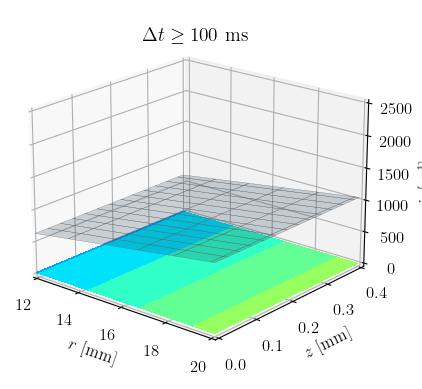

In [23]:
ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface
ax.plot_surface(1e3*rr[590:], 1e3*zz[590:], dutheta_dz_SS[590:], edgecolor='dimgray', 
                lw=0.2, rstride=80, cstride=80, alpha=0.2)

ax.set(xlim=(1e3*r0, 1e3*R), ylim=(0, 0.4), zlim=(0, 2500),
       xlabel=r'$r$ [mm]', ylabel=r'$z$ [mm]', zlabel=r'$\dot{\gamma}$ [s$^{-1}$]')

levels = np.arange(0, 2001, 125)
cont = ax.contourf(1e3*rr[590:], 1e3*zz[590:], dutheta_dz_SS[590:], levels, zdir='z', offset=0)#, cmap='coolwarm')

#plt.title(r'Steady-State Solution (200 rpm)', fontsize=14, y=1.05)
plt.title(r'$\Delta t \geq 100$ ms', fontsize=14, y=0.97)

ax.view_init(20, -50)
ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])

fileNamePdf = os.path.join('..', '02_Plots', '05_Simulation', '01_PDF', 'SteadyStateShear_3D.pdf')
fileNamePng = os.path.join('..', '02_Plots', '05_Simulation', '02_PNG', 'SteadyStateShear_3D.png')

plt.savefig(fileNamePdf, bbox_inches='tight', pad_inches=0.4)
plt.savefig(fileNamePng, bbox_inches='tight', pad_inches=0.4)

# alternatives: plt.contourf OR plt.pcolormesh

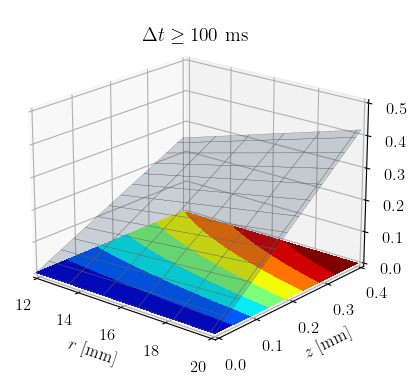

In [24]:
ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface
ax.plot_surface(1e3*rr[590:], 1e3*zz[590:], utheta_SS[590:], edgecolor='dimgray', 
                lw=0.2, rstride=80, cstride=80, alpha=0.2)

ax.set(xlim=(1e3*r0, 1e3*R), ylim=(0, 0.4), zlim=(0, 0.5),
       xlabel=r'$r$ [mm]', ylabel=r'$z$ [mm]', zlabel=r'$u_\theta$ [m s$^{-1}$]')

levels = np.arange(0, 0.4, 0.05)
cont = ax.contourf(1e3*rr[590:], 1e3*zz[590:], utheta_SS[590:], levels, zdir='z', offset=0, extend="max")

#plt.title(r'Steady-State Solution (200 rpm)', fontsize=14, y=1.05)
plt.title(r'$\Delta t \geq 100$ ms', fontsize=14, y=0.97)

ax.view_init(20, -50)
ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])

fileNamePdf = os.path.join('..', '02_Plots', '05_Simulation', '01_PDF', 'SteadyStateVelocity_3D.pdf')
fileNamePng = os.path.join('..', '02_Plots', '05_Simulation', '02_PNG', 'SteadyStateVelocity_3D.png')

plt.savefig(fileNamePdf, bbox_inches='tight', pad_inches=0.4)
plt.savefig(fileNamePng, bbox_inches='tight', pad_inches=0.4)

# alternatives: plt.contourf OR plt.pcolormesh

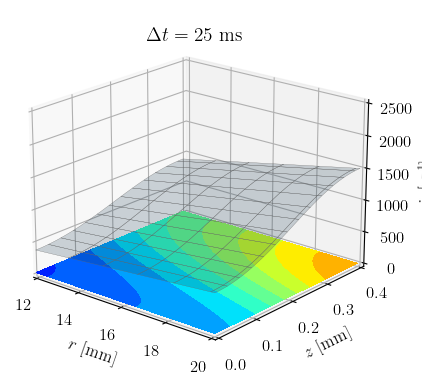

In [25]:
utheta = u_theta(rr, zz, 25e-3, alpha, R, H, Omega[1], nu)

# Define the derivative (finite differences)
d_dz = FinDiff(1, dz)

# Compute the derivative
dutheta_dz = d_dz(utheta)

ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface
ax.plot_surface(1e3*rr[590:], 1e3*zz[590:], dutheta_dz[590:], edgecolor='dimgray', 
                 lw=0.2, rstride=80, cstride=80, alpha=0.2)

ax.set(xlim=(1e3*r0, 1e3*R), ylim=(0, 0.4), zlim=(0, 2500),
       xlabel=r'$r$ [mm]', ylabel=r'$z$ [mm]', zlabel=r'$\dot{\gamma}$ [s$^{-1}$]')

levels = np.arange(0, 2001, 125)
ax.contourf(1e3*rr[590:], 1e3*zz[590:], dutheta_dz[590:], levels, zdir='z', offset=0, extend="max")
#plt.colorbar(cont, ax=ax, label=r'$\dot{\gamma}$  [s$^{-1}$]')
ax.set_xlim(1e3*r0, 1e3*R)

#plt.title(r'Transient Solution (200 rpm) after {:.0f} ms'.format(tx*1e3), fontsize=14, y=1.05)
plt.title(r'$\Delta t = 25$ ms', fontsize=14, y=0.97)

ax.view_init(20, -50)

ax = fig.add_axes([1000, 0.1, 0.6, 0.75])

fileNamePdf = os.path.join('..', '02_Plots', '05_Simulation', '01_PDF', 'TransientShear_25ms_3D.pdf')
fileNamePng = os.path.join('..', '02_Plots', '05_Simulation', '02_PNG', 'TransientShear_25ms_3D.png')

plt.savefig(fileNamePdf, bbox_inches='tight', pad_inches=0.4)
plt.savefig(fileNamePng, bbox_inches='tight', pad_inches=0.4)

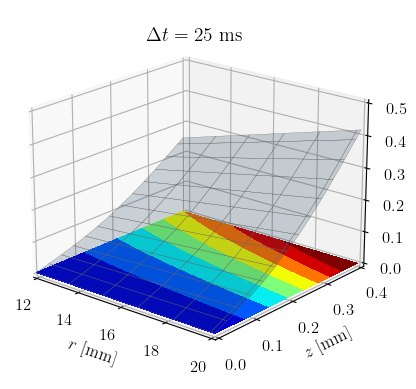

In [26]:
utheta = u_theta(rr, zz, 25e-3, alpha, R, H, Omega[1], nu)

ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface
ax.plot_surface(1e3*rr[590:], 1e3*zz[590:], utheta[590:], edgecolor='dimgray', 
                 lw=0.2, rstride=80, cstride=80, alpha=0.2)

ax.set(xlim=(1e3*r0, 1e3*R), ylim=(0, 0.4), zlim=(0, 0.5),
       xlabel=r'$r$ [mm]', ylabel=r'$z$ [mm]', zlabel=r'$u_\theta$ [m s$^{-1}$]')

levels = np.arange(0, 0.4, 0.05)
ax.contourf(1e3*rr[590:], 1e3*zz[590:], utheta[590:], levels, zdir='z', offset=0, extend="max")
#plt.colorbar(cont, ax=ax, label=r'$\dot{\gamma}$  [s$^{-1}$]')
ax.set_xlim(1e3*r0, 1e3*R)

#plt.title(r'Transient Solution (200 rpm) after {:.0f} ms'.format(tx*1e3), fontsize=14, y=1.05)
plt.title(r'$\Delta t = 25$ ms', fontsize=14, y=0.97)

ax.view_init(20, -50)

ax = fig.add_axes([1000, 0.1, 0.6, 0.75])

fileNamePdf = os.path.join('..', '02_Plots', '05_Simulation', '01_PDF', 'TransientVelocity_25ms_3D.pdf')
fileNamePng = os.path.join('..', '02_Plots', '05_Simulation', '02_PNG', 'TransientVelocity_25ms_3D.png')

plt.savefig(fileNamePdf, bbox_inches='tight', pad_inches=0.4)
plt.savefig(fileNamePng, bbox_inches='tight', pad_inches=0.4)

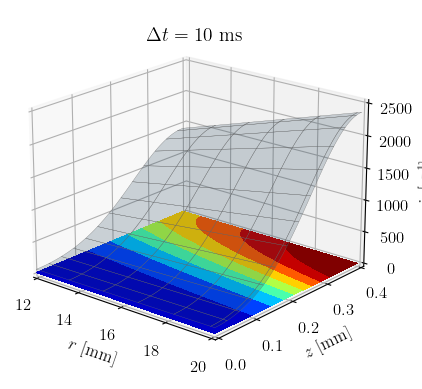

In [27]:
utheta = u_theta(rr, zz, 10e-3, alpha, R, H, Omega[1], nu)

# Define the derivative (finite differences)
d_dz = FinDiff(1, dz)

# Compute the derivative
dutheta_dz = d_dz(utheta)

ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface
ax.plot_surface(1e3*rr[590:], 1e3*zz[590:], dutheta_dz[590:], edgecolor='dimgray', 
                 lw=0.2, rstride=80, cstride=80, alpha=0.2)

ax.set(xlim=(1e3*r0, 1e3*R), ylim=(0, 0.4), zlim=(0, 2500),
       xlabel=r'$r$ [mm]', ylabel=r'$z$ [mm]', zlabel=r'$\dot{\gamma}$ [s$^{-1}$]')

levels = np.arange(0, 2001, 250)
ax.contourf(1e3*rr[590:], 1e3*zz[590:], dutheta_dz[590:], levels, zdir='z', offset=0, extend="max")
#plt.colorbar(cont, ax=ax, label=r'$\dot{\gamma}$  [s$^{-1}$]')
ax.set_xlim(1e3*r0, 1e3*R)

#plt.title(r'Transient Solution (200 rpm) after {:.0f} ms'.format(tx*1e3), fontsize=14, y=1.05)
plt.title(r'$\Delta t = 10$ ms', fontsize=14, y=0.97)

ax.view_init(20, -50)

ax = fig.add_axes([1000, 0.1, 0.6, 0.75])

fileNamePdf = os.path.join('..', '02_Plots', '05_Simulation', '01_PDF', 'TransientShear_10ms_3D.pdf')
fileNamePng = os.path.join('..', '02_Plots', '05_Simulation', '02_PNG', 'TransientShear_10ms_3D.png')

plt.savefig(fileNamePdf, bbox_inches='tight', pad_inches=0.4)
plt.savefig(fileNamePng, bbox_inches='tight', pad_inches=0.4)

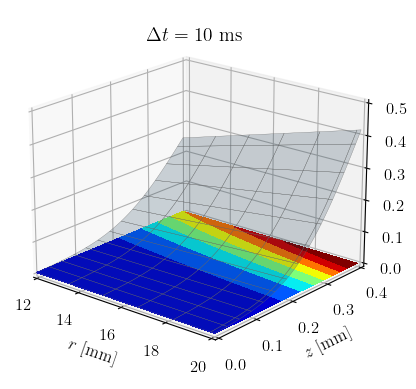

In [28]:
utheta = u_theta(rr, zz, 10e-3, alpha, R, H, Omega[1], nu)

ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface
ax.plot_surface(1e3*rr[590:], 1e3*zz[590:], utheta[590:], edgecolor='dimgray', 
                 lw=0.2, rstride=80, cstride=80, alpha=0.2)

ax.set(xlim=(1e3*r0, 1e3*R), ylim=(0, 0.4), zlim=(0, 0.5),
       xlabel=r'$r$ [mm]', ylabel=r'$z$ [mm]', zlabel=r'$u_\theta$ [m s$^{-1}$]')

levels = np.arange(0, 0.4, 0.05)
ax.contourf(1e3*rr[590:], 1e3*zz[590:], utheta[590:], levels, zdir='z', offset=0, extend="max")
#plt.colorbar(cont, ax=ax, label=r'$\dot{\gamma}$  [s$^{-1}$]')
ax.set_xlim(1e3*r0, 1e3*R)

#plt.title(r'Transient Solution (200 rpm) after {:.0f} ms'.format(tx*1e3), fontsize=14, y=1.05)
plt.title(r'$\Delta t = 10$ ms', fontsize=14, y=0.97)

ax.view_init(20, -50)

ax = fig.add_axes([1000, 0.1, 0.6, 0.75])

fileNamePdf = os.path.join('..', '02_Plots', '05_Simulation', '01_PDF', 'TransientVelocity_10ms_3D.pdf')
fileNamePng = os.path.join('..', '02_Plots', '05_Simulation', '02_PNG', 'TransientVelocity_10ms_3D.png')

plt.savefig(fileNamePdf, bbox_inches='tight', pad_inches=0.4)
plt.savefig(fileNamePng, bbox_inches='tight', pad_inches=0.4)

## 2.4 Animations (based on transient solution)

<div class="alert alert-block alert-danger">
<b>Attention:</b> The creation of these animations takes quite a while (> 10 min). To reduce waiting time, e.g. reduce number of frames or reduce resolution.
</div>


CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1280x960', '-pix_fmt', 'rgba', '-r', '30', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '../02_Plots/05_Simulation/03_MP4/VelocityEvolution_lowRes.mp4']' returned non-zero exit status 255.

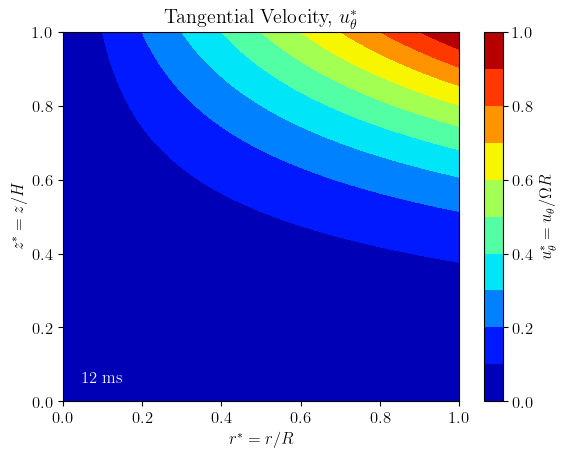

In [29]:
t_anim = t_ndim[1:]
t_real = t[1:]

# Create meshgrids for computations
rr_ndim, zz_ndim = np.meshgrid(r_ndim, z_ndim, indexing='ij')

levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
cmap = plt.cm.magma

fig, ax = plt.subplots()
p = [ax.contourf(rr_ndim, zz_ndim, u_theta_ndim(rr_ndim, zz_ndim, 0, alpha)), levels]

##### Calculation only to get correct colorbar #####

utheta_ndim = u_theta_ndim(rr_ndim, zz_ndim, t_anim[0], alpha)

p[0] = ax.contourf(rr_ndim, zz_ndim, utheta_ndim, levels) 

#####################################################

ax.set_title(r'Tangential Velocity, $u_\theta^*$')
ax.set_xlabel(r'$r^* = r/R$')
ax.set_ylabel(r'$z^* = z/H$')

txtTime = ax.text(0.05, 0.05, '{:.0f} ms'.format(1e3*t_real[0]), color='white')

plt.colorbar(p[0], ax=ax, label=r'$u_\theta^* = u_\theta / \Omega R$')

def update(i):
    for tp in p[0].collections:
        tp.remove()
    
    del fig.gca().texts[0]
        
    utheta_ndim = u_theta_ndim(rr_ndim, zz_ndim, t_anim[i], alpha)
    p[0] = ax.contourf(rr_ndim, zz_ndim, utheta_ndim, levels) 
    
    txtTime = ax.text(0.05, 0.05, '{:.0f} ms'.format(1e3*t_real[i]), color='white')
    
    return p[0].collections

anim = animation.FuncAnimation(fig, update, frames=600, blit=True, repeat=True)

# saving to m4 using ffmpeg writer
writervideo = animation.FFMpegWriter(fps=30)

fileName1 = os.path.join('..', '02_Plots', '05_Simulation', '03_MP4', 'VelocityEvolution_highRes.mp4')
fileName2 = os.path.join('..', '02_Plots', '05_Simulation', '03_MP4', 'VelocityEvolution_lowRes.mp4')

#anim.save(fileName1, writer=writervideo, dpi=800)
anim.save(fileName2, writer=writervideo, dpi=200)
plt.close()

In [ ]:
t_anim = t_ndim[1:]
t_real = t[1:]

# Create meshgrids for computations
rr_ndim, zz_ndim = np.meshgrid(r_ndim, z_ndim, indexing='ij')

levels = np.arange(0, 4.1, 0.25)

cmap = plt.cm.magma

fig, ax = plt.subplots()
p = [ax.contourf(rr_ndim, zz_ndim, u_theta_ndim(rr_ndim, zz_ndim, 0, alpha)), levels]

##### Calculation only to get correct colorbar #####

utheta_ndim = u_theta_ndim(rr_ndim, zz_ndim, t_anim[0], alpha)

# Define the derivative (finite differences)
d_dz = FinDiff(1, dz)

# Compute the derivative
dutheta_dz_ndim = d_dz(utheta_ndim)

p[0] = ax.contourf(rr_ndim, zz_ndim, dutheta_dz_ndim/np.max(dutheta_dz_SS_ndim), levels) 

#####################################################

ax.set_title(r'Shear Rate, $\dot{\gamma}^*$')
ax.set_xlabel(r'$r^* = r/R$')
ax.set_ylabel(r'$z^* = z/H$')

txtTime = ax.text(0.05, 0.05, '{:.0f} ms'.format(1e3*t_real[0]), color='white')


plt.colorbar(p[0], ax=ax, label=r'$\dot{\gamma}^* = \dot{\gamma}/$max$\{\dot{\gamma}_\mathrm{ss}\}$ ')

def update(i):
    for tp in p[0].collections:
        tp.remove()
        
    del fig.gca().texts[0]
        
    utheta_ndim = u_theta_ndim(rr_ndim, zz_ndim, t_anim[i], alpha)
        
    # Define the derivative (finite differences)
    d_dz = FinDiff(1, dz)

    # Compute the derivative
    dutheta_dz_ndim = d_dz(utheta_ndim)
    
    p[0] = ax.contourf(rr_ndim, zz_ndim, dutheta_dz_ndim/np.max(dutheta_dz_SS_ndim), levels)
    
    txtTime = ax.text(0.05, 0.05, '{:.0f} ms'.format(1e3*t_real[i]), color='white')
    
    return p[0].collections

anim = animation.FuncAnimation(fig, update, frames=600, blit=True, repeat=True)

fileName1 = os.path.join('..', '02_Plots', '05_Simulation', '03_MP4', 'ShearRateEvolution_highRes.mp4')
fileName2 = os.path.join('..', '02_Plots', '05_Simulation', '03_MP4', 'ShearRateEvolution_lowRes.mp4')

# saving to m4 using ffmpeg writer
writervideo = animation.FFMpegWriter(fps=30)
#anim.save(fileName1, writer=writervideo, dpi=800)
anim.save(fileName2, writer=writervideo, dpi=200)

plt.close()

In [ ]:
t_anim = t#[1:]
t_real = t#[1:]

# Create meshgrids for computations
rr_ndim, zz_ndim = np.meshgrid(r_ndim, z_ndim, indexing='ij')

levels = np.arange(0, 2001, 125)

cmap = plt.cm.magma

fig, ax = plt.subplots()
p = [ax.contourf(1e3*rr, 1e3*zz, u_theta(rr, zz, 0, alpha, R, H, Omega[1], nu), levels,  extend="max")]

##### Calculation only to get correct colorbar #####

utheta = u_theta(rr, zz, t_anim[0], alpha, R, H, Omega[1], nu)

# Define the derivative (finite differences)
d_dz = FinDiff(1, dz)

# Compute the derivative
dutheta_dz = d_dz(utheta)

p[0] = ax.contourf(1e3*rr, 1e3*zz, dutheta_dz, levels, extend="max") 

#####################################################

ax.set_title(r'Shear Rate, $\dot{\gamma}$ [s$^{-1}$]')
ax.set_xlabel(r'$r$ [mm]')
ax.set_ylabel(r'$z$ [mm]')
ax.set_xlim([1e3*r0, 1e3*R])


txtTime = ax.text(12.2, 0.015, '{:.0f} ms'.format(1e3*t_real[0]), color='white')


plt.colorbar(p[0], ax=ax, label=r'$\dot{\gamma}$ [s$^{-1}$] ')

def update(i):
    for tp in p[0].collections:
        tp.remove()
        
    del fig.gca().texts[0]
        
    utheta = u_theta(rr, zz, t_anim[i], alpha, R, H, Omega[1], nu)
        
    # Define the derivative (finite differences)
    d_dz = FinDiff(1, dz)

    # Compute the derivative
    dutheta_dz = d_dz(utheta)
    
    p[0] = ax.contourf(1e3*rr, 1e3*zz, dutheta_dz, levels, extend="max")
    
    txtTime = ax.text(12.2, 0.015, '{:.0f} ms'.format(1e3*t_real[i]), color='white')
    
    return p[0].collections

anim = animation.FuncAnimation(fig, update, frames=600, blit=True, repeat=True)

fileName1 = os.path.join('..', '02_Plots', '05_Simulation', '03_MP4', 'ShearRateEvolutionDimensional_highRes.mp4')
fileName2 = os.path.join('..', '02_Plots', '05_Simulation', '03_MP4', 'ShearRateEvolutionDimensional_lowRes.mp4')


# saving to m4 using ffmpeg writer
writervideo = animation.FFMpegWriter(fps=30)
#anim.save(fileName1, writer=writervideo, dpi=800)
anim.save(fileName2, writer=writervideo, dpi=200)

plt.close()

In [ ]:
t_anim = t#[1:]
t_real = t#[1:]

# Create meshgrids for computations
rr_ndim, zz_ndim = np.meshgrid(r_ndim, z_ndim, indexing='ij')

levels = np.arange(0, 0.41, 0.025)

cmap = plt.cm.magma

fig, ax = plt.subplots()
p = [ax.contourf(1e3*rr, 1e3*zz, u_theta(rr, zz, 0, alpha, R, H, Omega[1], nu), levels,  extend="max")]

##### Calculation only to get correct colorbar #####

utheta = u_theta(rr, zz, t_anim[0], alpha, R, H, Omega[1], nu)

# Define the derivative (finite differences)
d_dz = FinDiff(1, dz)

# Compute the derivative
dutheta_dz = d_dz(utheta)

p[0] = ax.contourf(1e3*rr, 1e3*zz, utheta, levels, extend="max") 

#####################################################

ax.set_title(r'Tangential Velocity, $u_\theta$ [m s$^{-1}$]')
ax.set_xlabel(r'$r$ [mm]')
ax.set_ylabel(r'$z$ [mm]')
ax.set_xlim([1e3*r0, 1e3*R])


txtTime = ax.text(12.2, 0.015, '{:.0f} ms'.format(1e3*t_real[0]), color='white')


plt.colorbar(p[0], ax=ax, label=r'$u_\theta$ [m s$^{-1}$] ')

def update(i):
    for tp in p[0].collections:
        tp.remove()
        
    del fig.gca().texts[0]
        
    utheta = u_theta(rr, zz, t_anim[i], alpha, R, H, Omega[1], nu)
        
    # Define the derivative (finite differences)
    d_dz = FinDiff(1, dz)

    # Compute the derivative
    dutheta_dz = d_dz(utheta)
    
    p[0] = ax.contourf(1e3*rr, 1e3*zz, utheta, levels, extend="max")
    
    txtTime = ax.text(12.2, 0.015, '{:.0f} ms'.format(1e3*t_real[i]), color='white')
    
    return p[0].collections

anim = animation.FuncAnimation(fig, update, frames=600, blit=True, repeat=True)

fileName1 = os.path.join('..', '02_Plots', '05_Simulation', '03_MP4', 'VelocityEvolutionDimensional_highRes.mp4')
fileName2 = os.path.join('..', '02_Plots', '05_Simulation', '03_MP4', 'VelocityEvolutionDimensional_lowRes.mp4')

# saving to m4 using ffmpeg writer
writervideo = animation.FFMpegWriter(fps=30)
#anim.save(fileName1, writer=writervideo, dpi=800)
anim.save(fileName2, writer=writervideo, dpi=200)

plt.close()

Work in progress (animation of a 3D plot):

In [ ]:
from matplotlib import cm

t_anim = t#[1:]
t_real = t#[1:]

# Create meshgrids for computations
rr_ndim, zz_ndim = np.meshgrid(r_ndim, z_ndim, indexing='ij')

levels = np.arange(0, 2001, 125)

cmap = plt.cm.magma

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the 3D surface

p = [ax.plot_surface(1e3*rr[600:], 1e3*zz[600:], u_theta(rr[600:], zz[600:], 0, alpha, R, H, Omega[1], nu), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.8)]

##### Calculation only to get correct colorbar #####

utheta = u_theta(rr, zz, t_anim[0], alpha, R, H, Omega[1], nu)

# Define the derivative (finite differences)
d_dz = FinDiff(1, dz)

# Compute the derivative
dutheta_dz = d_dz(utheta)

p[0] = ax.plot_surface(1e3*rr[600:], 1e3*zz[600:], dutheta_dz[600:], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.8)

#####################################################

ax.set_xlim(1e3*r0, 1e3*R)
ax.set_zlim(0, 1200)
#ax.set_ylim(0, 0.4)
ax.set_xlabel(r'$r$ [mm]')
ax.set_ylabel(r'$z$ [mm]')


#txtTime = ax.text(12.2, 0.015, '{:.0f} ms'.format(1e3*t_real[0]), color='white')

#plt.colorbar(p[0], ax=ax, label=r'$\dot{\gamma}$ [s$^{-1}$] ')

def update(i):
    
    for tp in p:
        tp.remove()
                
    utheta = u_theta(rr, zz, t_anim[i], alpha, R, H, Omega[1], nu)
        
    # Define the derivative (finite differences)
    d_dz = FinDiff(1, dz)

    # Compute the derivative
    dutheta_dz = d_dz(utheta)
    
    p[0] = ax.plot_surface(1e3*rr[600:], 1e3*zz[600:], dutheta_dz[600:], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.8)
    
    #ax.contourf(1e3*rr[600:], 1e3*zz[600:], dutheta_dz[600:], zdir='z', offset=0, cmap='coolwarm')
    #ax.set_xlim(1e3*r0, 1e3*R)
    #txtTime = ax.text(12.2, 0.015, '{:.0f} ms'.format(1e3*t_real[i]), color='white')
    
    return p

anim = animation.FuncAnimation(fig, update, frames=600, blit=True, repeat=True)

fileName1 = os.path.join('..', '02_Plots', '05_Simulation', '03_MP4', 'ShearRateEvolution3D_highRes.mp4')
fileName2 = os.path.join('..', '02_Plots', '05_Simulation', '03_MP4', 'ShearRateEvolution3D_lowRes.mp4')

# saving to m4 using ffmpeg writer
writervideo = animation.FFMpegWriter(fps=30)
#anim.save(fileName1, writer=writervideo, dpi=800)
anim.save(fileName2, writer=writervideo, dpi=200)

plt.close()